<h1 style="color:cadetblue; font-size:2em;">Indexing time series</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sales = pd.read_csv('datasets/sales-feb-2015.csv', index_col='Date', parse_dates=True)

In [4]:
sales = sales.sort_index()

In [163]:
sales.head()

,Company,Product,Units
Date,,,
2015-02-02 08:33:01,Hooli,Software,3
2015-02-02 20:54:49,Mediacore,Hardware,9
2015-02-03 14:14:18,Initech,Software,13
2015-02-04 15:36:29,Streeplex,Software,13
2015-02-04 21:52:45,Acme Coporation,Hardware,14


In [131]:
type(sales.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [132]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-02 08:33:01 to 2015-02-26 08:58:51
Data columns (total 3 columns):
Company    20 non-null object
Product    20 non-null object
Units      20 non-null int64
dtypes: int64(1), object(2)
memory usage: 640.0+ bytes


In [133]:
sales.loc['2015-02-19 16:02:58', 'Company']

'Mediacore'

In [134]:
sales.loc['2015-2-5']

,Company,Product,Units
Date,,,
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-05 22:05:03,Hooli,Service,10


In [135]:
sales.loc['2015-2']

,Company,Product,Units
Date,,,
2015-02-02 08:33:01,Hooli,Software,3
2015-02-02 20:54:49,Mediacore,Hardware,9
2015-02-03 14:14:18,Initech,Software,13
2015-02-04 15:36:29,Streeplex,Software,13
2015-02-04 21:52:45,Acme Coporation,Hardware,14
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-05 22:05:03,Hooli,Service,10
2015-02-07 22:58:10,Acme Coporation,Hardware,1
2015-02-09 08:57:30,Streeplex,Service,19


In [136]:
sales.loc['2015-2-16':'2015-2-20']

,Company,Product,Units
Date,,,
2015-02-16 12:09:19,Hooli,Software,10
2015-02-19 10:59:33,Mediacore,Hardware,16
2015-02-19 16:02:58,Mediacore,Service,10


In [5]:
sales['2015-2']

,Company,Product,Units
Date,,,
2015-02-02 08:33:01,Hooli,Software,3
2015-02-02 20:54:49,Mediacore,Hardware,9
2015-02-03 14:14:18,Initech,Software,13
2015-02-04 15:36:29,Streeplex,Software,13
2015-02-04 21:52:45,Acme Coporation,Hardware,14
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-05 22:05:03,Hooli,Service,10
2015-02-07 22:58:10,Acme Coporation,Hardware,1
2015-02-09 08:57:30,Streeplex,Service,19


In [142]:
eve = pd.to_datetime(['2015-2-11 20:03:08', '2015-2-11 21:00','2015-2-11 22:00','2015-2-11 22:50:44'])

In [154]:
sales.reindex(eve)

,Company,Product,Units
2015-02-11 20:03:08,Initech,Software,7.0
2015-02-11 21:00:00,NaN,NaN,NaN
2015-02-11 22:00:00,NaN,NaN,NaN
2015-02-11 22:50:44,Hooli,Software,4.0


In [153]:
sales.reindex(eve, method='ffill')

,Company,Product,Units
2015-02-11 20:03:08,Initech,Software,7
2015-02-11 21:00:00,Initech,Software,7
2015-02-11 22:00:00,Initech,Software,7
2015-02-11 22:50:44,Hooli,Software,4


In [155]:
sales.reindex(eve, method='bfill')

,Company,Product,Units
2015-02-11 20:03:08,Initech,Software,7
2015-02-11 21:00:00,Hooli,Software,4
2015-02-11 22:00:00,Hooli,Software,4
2015-02-11 22:50:44,Hooli,Software,4


<h1 style="color:cadetblue; font-size:2em;">Resampling time series data</h1>

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sales = pd.read_csv('datasets/sales-feb-2015.csv', index_col='Date', parse_dates=True)
sales = sales.sort_index()

In [171]:
sales

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-09 08:57:30,Streeplex,Service,19
2015-02-11 20:03:08,Initech,Software,7
2015-02-04 21:52:45,Acme Coporation,Hardware,14


In [172]:
daily_mean = sales.resample('D').mean() 
daily_mean

,Units
Date,
2015-02-02,6.0
2015-02-03,13.0
2015-02-04,13.5
2015-02-05,14.5
2015-02-06,NaN
2015-02-07,1.0
2015-02-08,NaN
2015-02-09,13.0
2015-02-10,NaN


In [175]:
sales.resample('D').sum()

,Units
Date,
2015-02-02,12
2015-02-03,13
2015-02-04,27
2015-02-05,29
2015-02-06,0
2015-02-07,1
2015-02-08,0
2015-02-09,26
2015-02-10,0


In [178]:
sales.resample('D').sum().max()

Units    29
dtype: int64

In [179]:
sales.resample('W').count()

,Company,Product,Units
Date,,,
2015-02-08,8,8,8
2015-02-15,4,4,4
2015-02-22,5,5,5
2015-03-01,3,3,3


In [180]:
sales.loc[:,'Units'].resample('2W').sum()

Date
2015-02-08    82
2015-02-22    79
2015-03-08    15
Freq: 2W-SUN, Name: Units, dtype: int64

In [183]:
two_days = sales.loc['2015-2-4':'2015-2-5', 'Units']
two_days

Date
2015-02-04 15:36:29    13
2015-02-04 21:52:45    14
2015-02-05 01:53:06    19
2015-02-05 22:05:03    10
Name: Units, dtype: int64

In [185]:
two_days.resample('4H').ffill()

Date
2015-02-04 12:00:00     NaN
2015-02-04 16:00:00    13.0
2015-02-04 20:00:00    13.0
2015-02-05 00:00:00    14.0
2015-02-05 04:00:00    19.0
2015-02-05 08:00:00    19.0
2015-02-05 12:00:00    19.0
2015-02-05 16:00:00    19.0
2015-02-05 20:00:00    19.0
Freq: 4H, Name: Units, dtype: float64

<h1 style="color:cadetblue; font-size:2em;">Manipulating time series data</h1>

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sales = pd.read_csv('datasets/sales-feb-2015.csv', parse_dates=['Date'])
sales = sales.sort_index()

In [188]:
sales.head()

,Date,Company,Product,Units
0,2015-02-26 08:57:45,Streeplex,Service,4
1,2015-02-16 12:09:19,Hooli,Software,10
2,2015-02-03 14:14:18,Initech,Software,13
3,2015-02-02 08:33:01,Hooli,Software,3
4,2015-02-25 00:29:00,Initech,Service,10


In [189]:
sales.Company.str.upper()

0           STREEPLEX
1               HOOLI
2             INITECH
3               HOOLI
4             INITECH
5     ACME COPORATION
6           STREEPLEX
7             INITECH
8     ACME COPORATION
9           MEDIACORE
10    ACME COPORATION
11              HOOLI
12          STREEPLEX
13              HOOLI
14          STREEPLEX
15          MEDIACORE
16          MEDIACORE
17          MEDIACORE
18          MEDIACORE
19              HOOLI
Name: Company, dtype: object

In [191]:
sales['Product'].str.contains('ware')

0     False
1      True
2      True
3      True
4     False
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15    False
16     True
17     True
18     True
19     True
Name: Product, dtype: bool

<strong>Boolean Arithmetic</strong>

In [195]:
True + False

1

In [196]:
True + True

2

In [198]:
False + False

0

In [199]:
sales['Product'].str.contains('ware').sum()

14

In [200]:
sales['Date'].dt.hour

0      8
1     12
2     14
3      8
4      0
5      1
6      8
7     20
8     21
9     13
10    22
11    22
12     8
13    22
14    15
15    16
16    10
17    20
18     5
19    20
Name: Date, dtype: int64

In [208]:
cen=sales['Date'].dt.tz_localize('US/Central')
cen

0    2015-02-26 08:57:45-06:00
1    2015-02-16 12:09:19-06:00
2    2015-02-03 14:14:18-06:00
3    2015-02-02 08:33:01-06:00
4    2015-02-25 00:29:00-06:00
5    2015-02-05 01:53:06-06:00
6    2015-02-09 08:57:30-06:00
7    2015-02-11 20:03:08-06:00
8    2015-02-04 21:52:45-06:00
9    2015-02-09 13:09:55-06:00
10   2015-02-07 22:58:10-06:00
11   2015-02-11 22:50:44-06:00
12   2015-02-26 08:58:51-06:00
13   2015-02-05 22:05:03-06:00
14   2015-02-04 15:36:29-06:00
15   2015-02-19 16:02:58-06:00
16   2015-02-19 10:59:33-06:00
17   2015-02-02 20:54:49-06:00
18   2015-02-21 05:01:26-06:00
19   2015-02-21 20:41:47-06:00
Name: Date, dtype: datetime64[ns, US/Central]

In [207]:
central.dt.tz_convert('US/Eastern')

0    2015-02-26 09:57:45-05:00
1    2015-02-16 13:09:19-05:00
2    2015-02-03 15:14:18-05:00
3    2015-02-02 09:33:01-05:00
4    2015-02-25 01:29:00-05:00
5    2015-02-05 02:53:06-05:00
6    2015-02-09 09:57:30-05:00
7    2015-02-11 21:03:08-05:00
8    2015-02-04 22:52:45-05:00
9    2015-02-09 14:09:55-05:00
10   2015-02-07 23:58:10-05:00
11   2015-02-11 23:50:44-05:00
12   2015-02-26 09:58:51-05:00
13   2015-02-05 23:05:03-05:00
14   2015-02-04 16:36:29-05:00
15   2015-02-19 17:02:58-05:00
16   2015-02-19 11:59:33-05:00
17   2015-02-02 21:54:49-05:00
18   2015-02-21 06:01:26-05:00
19   2015-02-21 21:41:47-05:00
Name: Date, dtype: datetime64[ns, US/Eastern]

In [209]:
sales['Date'].dt.tz_localize('US/Central').dt.tz_convert('US/Eastern')

0    2015-02-26 09:57:45-05:00
1    2015-02-16 13:09:19-05:00
2    2015-02-03 15:14:18-05:00
3    2015-02-02 09:33:01-05:00
4    2015-02-25 01:29:00-05:00
5    2015-02-05 02:53:06-05:00
6    2015-02-09 09:57:30-05:00
7    2015-02-11 21:03:08-05:00
8    2015-02-04 22:52:45-05:00
9    2015-02-09 14:09:55-05:00
10   2015-02-07 23:58:10-05:00
11   2015-02-11 23:50:44-05:00
12   2015-02-26 09:58:51-05:00
13   2015-02-05 23:05:03-05:00
14   2015-02-04 16:36:29-05:00
15   2015-02-19 17:02:58-05:00
16   2015-02-19 11:59:33-05:00
17   2015-02-02 21:54:49-05:00
18   2015-02-21 06:01:26-05:00
19   2015-02-21 21:41:47-05:00
Name: Date, dtype: datetime64[ns, US/Eastern]

In [214]:
population = pd.read_csv('datasets/world_population.csv', parse_dates=True,header=0, names=['Date','Population'], index_col='Date')

In [215]:
population

,Population
Date,
1960-01-01,3.034971e+09
1970-01-01,3.684823e+09
1980-01-01,4.436590e+09
1990-01-01,5.282716e+09
2000-01-01,6.115974e+09
2010-01-01,6.924283e+09


In [216]:
population.resample('A').first()

,Population
Date,
1960-12-31,3.034971e+09
1961-12-31,NaN
1962-12-31,NaN
1963-12-31,NaN
1964-12-31,NaN
1965-12-31,NaN
1966-12-31,NaN
1967-12-31,NaN
1968-12-31,NaN


In [217]:
population.resample('A').first().interpolate('linear')

,Population
Date,
1960-12-31,3.034971e+09
1961-12-31,3.099956e+09
1962-12-31,3.164941e+09
1963-12-31,3.229926e+09
1964-12-31,3.294911e+09
1965-12-31,3.359897e+09
1966-12-31,3.424882e+09
1967-12-31,3.489867e+09
1968-12-31,3.554852e+09


<h1 style="color:cadetblue; font-size:2em;">Time series visualization</h1>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sp500 = pd.read_csv('datasets/sp500.csv', index_col='Date',  parse_dates=True)
sp500 = sp500.sort_index()
sp500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1957-03-04,44.060001,44.060001,44.060001,44.060001,1890000,44.060001
1957-03-05,44.220001,44.220001,44.220001,44.220001,1860000,44.220001
1957-03-06,44.230000,44.230000,44.230000,44.230000,1840000,44.230000
1957-03-07,44.209999,44.209999,44.209999,44.209999,1830000,44.209999
1957-03-08,44.070000,44.070000,44.070000,44.070000,1630000,44.070000


<strong>Pandas plot</strong>

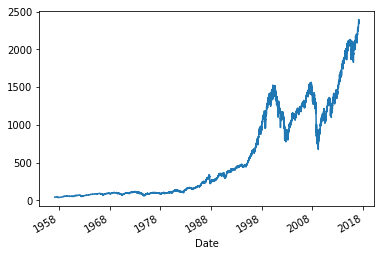

In [3]:
sp500['Close'].plot()
plt.show()

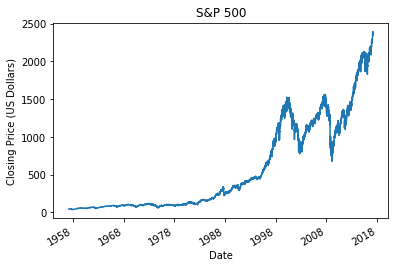

In [5]:
sp500['Close'].plot(title='S&P 500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

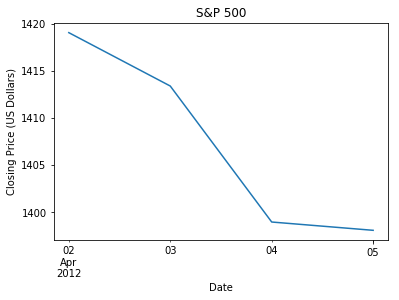

In [21]:
sp500.loc['2012-04-01':'2012-04-07', 'Close'].plot(title='S&P 500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

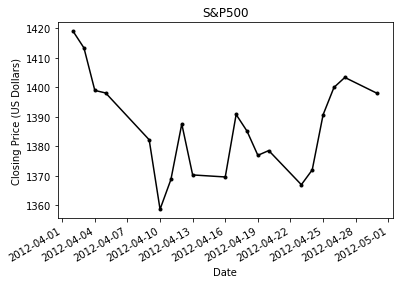

In [22]:
sp500.loc['2012-4', 'Close'].plot(style='k.-', title='S&P500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

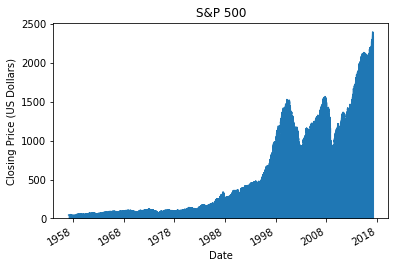

In [23]:
sp500['Close'].plot(kind='area', title='S&P 500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

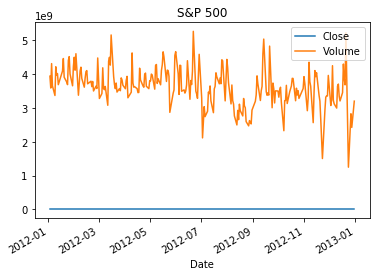

In [24]:
sp500.loc['2012', ['Close', 'Volume']].plot(title='S&P 500')
plt.show()

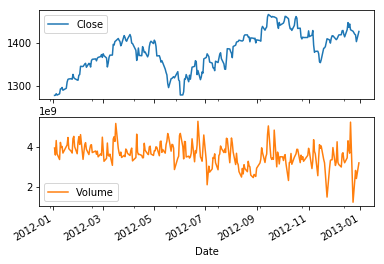

In [25]:
sp500.loc['2012', ['Close', 'Volume']].plot(subplots=True)
plt.show()